# 최적 모델 탐색

최적 알고리즘 및 하이퍼 파라미터 탐색 코드입니다.  
구글 코랩 환경에서 실행합니다

<br/>
<br/>

## 한글 폰트 지정

구글에서 한글 사용시 폰트가 깨지는 문제를 해결  

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

NanumGothic


<br/>
<br/>

## 학습할 데이터 불러오기

train_male.csv를 선택하여 업로드 합니다  
train_male.csv는 17.10 ~ 22.02 기간의 데이터입니다  

In [3]:
# Import module 
import pandas as pd
from google.colab import files
import io

In [4]:
# 파일 불러오기
myfile = files.upload()

# 업로드 된 train_male.csv를 train_male DF에 저장합니다
train_male = pd.read_csv(io.BytesIO(myfile['train_male.csv']))

# 의도하지 않게 생성된 인덱스 칼럼을 제거합니다
train_male.drop(['Unnamed: 0'], axis = 1, inplace = True)

Saving train_male.csv to train_male.csv


In [5]:
# DF에 데이터가 잘 저장되었는지 확인합니다
train_male

,결과,득점_득점,공격종합성공률,후위성공률,퀵오픈성공률,서브성공률,디그성공률,세트성공률,리시브성공률,블로킹성공률,...,팀명_우리카드,팀명_한국전력,팀명_현대캐피탈,상대팀_KB손해보험,상대팀_OK금융그룹,상대팀_대한항공,상대팀_삼성화재,상대팀_우리카드,상대팀_한국전력,상대팀_현대캐피탈
0,1,76,0.525862,0.382353,0.714286,0.097087,0.804348,0.517857,0.481928,0.102041,...,0,0,0,0,0,0,1,0,0,0
1,1,50,0.523810,0.470588,0.500000,0.114286,0.883721,0.479452,0.454545,0.243243,...,0,0,0,0,0,0,0,0,0,1
2,0,59,0.438095,0.458333,0.517241,0.075000,0.809524,0.413793,0.493333,0.109375,...,0,0,0,0,0,0,0,0,1,0
3,1,48,0.480519,0.529412,0.733333,0.122449,0.729730,0.492958,0.340426,0.208333,...,0,0,0,0,0,1,0,0,0,0
4,0,81,0.538462,0.620690,0.468750,0.074074,0.800000,0.486239,0.510204,0.175439,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,0,68,0.508929,0.458333,0.583333,0.000000,0.729167,0.472441,0.562500,0.177419,...,0,0,1,0,0,0,0,1,0,0
1216,0,25,0.478261,0.375000,0.500000,0.021277,0.740741,0.454545,0.425532,0.090909,...,0,0,1,0,0,0,1,0,0,0
1217,0,62,0.475248,0.500000,0.645161,0.035714,0.629630,0.448980,0.623188,0.229167,...,0,0,1,0,0,1,0,0,0,0
1218,0,35,0.476923,0.388889,0.647059,0.025641,0.805556,0.455696,0.383333,0.107143,...,0,0,1,1,0,0,0,0,0,0


<br/>
<br/>

## 학습 데이터와 검증 데이터 분리

7:3 비율로 분리합니다  

In [6]:
# train DF에 학습 데이터 저장
train = train_male.sample(frac=0.7, random_state=0)
train.reset_index(inplace=True, drop=True)

# test DF에 검증 데이터 저장
test = train_male.drop(train.index)
test.reset_index(inplace=True, drop=True)

In [7]:
# DF에 데이터가 잘 저장되었는지 확인합니다
test

,결과,득점_득점,공격종합성공률,후위성공률,퀵오픈성공률,서브성공률,디그성공률,세트성공률,리시브성공률,블로킹성공률,...,팀명_우리카드,팀명_한국전력,팀명_현대캐피탈,상대팀_KB손해보험,상대팀_OK금융그룹,상대팀_대한항공,상대팀_삼성화재,상대팀_우리카드,상대팀_한국전력,상대팀_현대캐피탈
0,0,35,0.415385,0.434783,0.500000,0.060000,0.750000,0.377049,0.327273,0.238095,...,1,0,0,0,1,0,0,0,0,0
1,1,81,0.477273,0.500000,0.560000,0.046729,0.680556,0.450382,0.391304,0.213115,...,1,0,0,0,0,0,0,0,0,1
2,1,81,0.468750,0.368421,0.476190,0.037383,0.822581,0.456000,0.370787,0.217949,...,1,0,0,0,0,0,1,0,0,0
3,0,33,0.467742,0.200000,0.400000,0.020833,0.687500,0.449275,0.280000,0.142857,...,1,0,0,0,0,1,0,0,0,0
4,0,57,0.505618,0.576923,0.444444,0.058824,0.690476,0.463158,0.333333,0.148936,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,68,0.508929,0.458333,0.583333,0.000000,0.729167,0.472441,0.562500,0.177419,...,0,0,1,0,0,0,0,1,0,0
362,0,25,0.478261,0.375000,0.500000,0.021277,0.740741,0.454545,0.425532,0.090909,...,0,0,1,0,0,0,1,0,0,0
363,0,62,0.475248,0.500000,0.645161,0.035714,0.629630,0.448980,0.623188,0.229167,...,0,0,1,0,0,1,0,0,0,0
364,0,35,0.476923,0.388889,0.647059,0.025641,0.805556,0.455696,0.383333,0.107143,...,0,0,1,1,0,0,0,0,0,0


<br/>
<br/>

## pycaret Install & import

In [8]:
# pycaret 및 shap 모듈 설치
!pip install pycaret --quiet
!pip install shap --quiet

# numba 버전 변경
!pip install numba==0.53

# scikit-learn 버전 변경
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.2

# pycaret 모듈 Importing
from pycaret.classification import *

     |████████████████████████████████| 320 kB 4.0 MB/s 
     |████████████████████████████████| 2.0 MB 64.5 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 167 kB 71.7 MB/s 
     |████████████████████████████████| 6.8 MB 27.4 MB/s 
     |████████████████████████████████| 16.9 MB 44.5 MB/s 
     |████████████████████████████████| 137 kB 71.6 MB/s 
     |████████████████████████████████| 268 kB 45.3 MB/s 
     |████████████████████████████████| 10.4 MB 9.5 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 67.6 MB/s 
     |████████████████████████████████| 3.3 MB 46.5 MB/s 
     |████████████████████████████████| 88 kB 6.5 MB/s 
     |████████████████████████████████| 1.7 MB 62.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |█████████████████

<br/>
<br/>

## 모델 세팅 및 최적 모델 탐색

In [9]:
# setup
exp_clf = setup(data = train, target = '결과', session_id=123)

,Description,Value
0,session_id,123
1,Target,결과
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(854, 24)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='결과',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [10]:
# 최적 모델 탐색을 위한 모델별 결과 비교
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8477,0.9251,0.8816,0.8328,0.8549,0.6947,0.6993,0.023
ridge,Ridge Classifier,0.8242,0.0000,0.8815,0.7985,0.8363,0.6470,0.6545,0.022
rf,Random Forest Classifier,0.8160,0.8976,0.8329,0.8129,0.8205,0.6315,0.6363,0.635
ada,Ada Boost Classifier,0.8141,0.8916,0.8161,0.8201,0.8163,0.6281,0.6305,0.215
gbc,Gradient Boosting Classifier,0.8075,0.9027,0.8228,0.8053,0.8128,0.6145,0.6165,0.297
lightgbm,Light Gradient Boosting Machine,0.8059,0.8980,0.8324,0.7990,0.8132,0.6109,0.6150,0.130
et,Extra Trees Classifier,0.7974,0.8797,0.8227,0.7956,0.8056,0.5938,0.6003,0.533
nb,Naive Bayes,0.7857,0.8693,0.8222,0.7788,0.7965,0.5699,0.5767,0.022
lr,Logistic Regression,0.7673,0.8632,0.8122,0.7554,0.7787,0.5331,0.5421,0.540
dt,Decision Tree Classifier,0.7338,0.7333,0.7539,0.7345,0.7426,0.4668,0.4690,0.031


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [11]:
# 지원모델 목록 출력
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


<br/>
<br/>

## Random Forest 모델 생성 및 튜닝

In [12]:
# Random Forest 모델 채택하여 모델 생성
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8167,0.8944,0.8000,0.8276,0.8136,0.6333,0.6337
1,0.8500,0.9372,0.8333,0.8621,0.8475,0.7000,0.7004
2,0.8500,0.9394,0.8000,0.8889,0.8421,0.7000,0.7035
3,0.8000,0.8888,0.7742,0.8276,0.8000,0.6004,0.6018
4,0.7000,0.8298,0.6774,0.7241,0.7000,0.4007,0.4016
5,0.8000,0.8821,0.9032,0.7568,0.8235,0.5969,0.6094
6,0.7667,0.8471,0.7742,0.7742,0.7742,0.5328,0.5328
7,0.8814,0.9270,1.0000,0.8108,0.8955,0.7617,0.7843
8,0.8644,0.9161,0.9333,0.8235,0.8750,0.7281,0.7349


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [13]:
# Random Forest 모델 Tuning
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8167,0.9022,0.8667,0.7879,0.8254,0.6333,0.6365
1,0.8000,0.9211,0.8000,0.8000,0.8000,0.6000,0.6000
2,0.8500,0.9300,0.8000,0.8889,0.8421,0.7000,0.7035
3,0.7833,0.8788,0.7419,0.8214,0.7797,0.5676,0.5705
4,0.7333,0.8465,0.7742,0.7273,0.7500,0.4649,0.4659
5,0.7500,0.8554,0.8710,0.7105,0.7826,0.4955,0.5098
6,0.7833,0.8465,0.8065,0.7812,0.7937,0.5657,0.5660
7,0.8305,0.9126,0.9000,0.7941,0.8438,0.6601,0.6663
8,0.8475,0.8908,0.9000,0.8182,0.8571,0.6943,0.6979


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [14]:
# 튜닝된 모델의 성능 확인
tuned_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

<br/>
<br/>

## Prediction

최적 모델인 Random Forest를 이용하여 Predict 시행

In [15]:
# 검증 데이터를 이용하여 predict 시행
prediction = predict_model(tuned_rf, data = test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8689,0.9319,0.8393,0.8704,0.8545,0.7352,0.7356


<br/>
<br/>

## 훈련된 모델의 성능 시각화

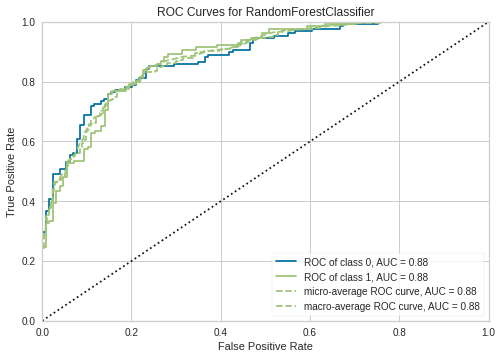

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
# import rf
'''
'auc' - Area Under the Curve -> 기본값
'threshold' - Discrimination Threshold
'pr' - Precision Recall Curve
'confusion_matrix' - Confusion Matrix
'error' - Class Prediction Error
'class_report' - Classification Report
'boundary' - Decision Boundary
'rfe' - Recursive Feature Selection
'learning' - Learning Curve
'manifold' - Manifold Learning
'calibration' - Calibration Curve
'vc' - Validation Curve
'dimension' - Dimension Learning
'feature' - Feature Importance
'feature_all' - Feature Importance (All)
'parameter' - Model Hyperparameter
'lift' - Lift Curve
'gain' - Gain Chart
'tree' - Decision Tree
'ks' - KS Statistic Plot
'''
# ROC curve 시각화
plot_model(tuned_rf)

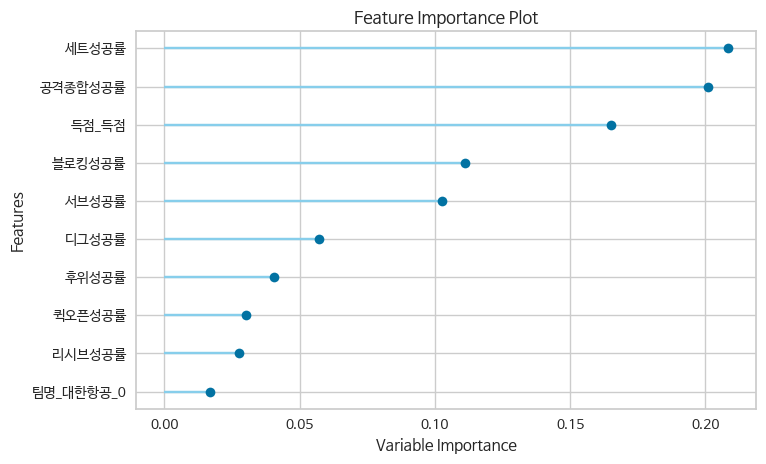

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
# feature 별 중요도 시각화
plt.rc('font', family='NanumBarunGothic')
plot_model(tuned_rf, plot="feature")
plt.show()

# 한글 폰트 깨질 경우 런타임 다시 시작 후 재가동

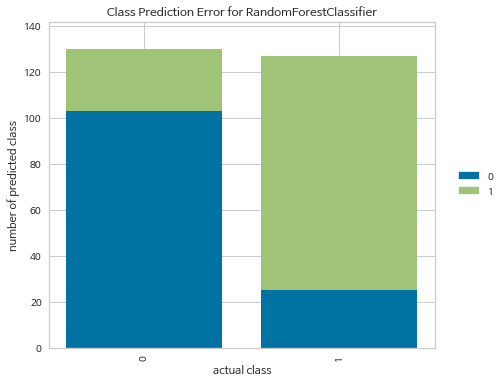

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [18]:
# 예측 결과 중 오답 비율 시각화
plot_model(tuned_rf, plot="error")

In [19]:
# 훈련된 모델의 모든 성능정보를 출력
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [20]:
# 최종 모델
final_rf = finalize_model(tuned_rf)
print(final_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                  

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


<br/>
<br/>

## 예측할 데이터 불러오기
 
test_male.csv를 선택하여 업로드 합니다  
test_male.csv는 최종적으로 예측해야하는 22.03 ~ 04 기간의 데이터입니다  

In [21]:
# 파일 불러오기
myfile = files.upload()

# 업로드 된 train_male.csv를 train_male DF에 저장합니다
import io
test_male = pd.read_csv(io.BytesIO(myfile['test_male.csv']))

# 의도하지 않게 생성된 인덱스 칼럼을 제거합니다
test_male.drop(['Unnamed: 0'], axis = 1, inplace = True)

Saving test_male.csv to test_male.csv


In [22]:
# 경기 결과를 예측하여 test_predictions DF에 저장
test_predictions = predict_model(final_rf, data = test_male)
test_predictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8065,0.8616,0.7742,0.8276,0.8,0.6129,0.6142


,결과,득점_득점,공격종합성공률,후위성공률,퀵오픈성공률,서브성공률,디그성공률,세트성공률,리시브성공률,블로킹성공률,...,팀명_현대캐피탈,상대팀_KB손해보험,상대팀_OK금융그룹,상대팀_대한항공,상대팀_삼성화재,상대팀_우리카드,상대팀_한국전력,상대팀_현대캐피탈,Label,Score
0,1,52,0.541667,0.523810,0.727273,0.082192,0.771429,0.541667,0.276596,0.184211,...,0,0,0,0,1,0,0,0,1,0.7949
1,1,66,0.554348,0.538462,0.500000,0.073684,0.673913,0.550562,0.419355,0.242424,...,0,0,0,0,0,0,0,1,1,0.7916
2,1,88,0.649573,0.625000,0.677419,0.041237,0.672727,0.582609,0.333333,0.160000,...,0,0,0,0,0,1,0,0,1,0.8225
3,1,86,0.620690,0.666667,1.000000,0.058252,0.730769,0.586667,0.379310,0.148148,...,0,0,1,0,0,0,0,0,1,0.8693
4,0,67,0.491071,0.536585,0.650000,0.047619,0.733333,0.472727,0.348837,0.125000,...,0,0,0,1,0,0,0,0,0,0.7793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,25,0.442308,0.307692,0.615385,0.000000,0.742857,0.409836,0.425532,0.066667,...,1,0,0,1,0,0,0,0,0,0.9525
58,1,78,0.575758,0.650000,0.542857,0.094340,0.737705,0.491667,0.579545,0.229167,...,1,0,0,0,1,0,0,0,1,0.8564
59,1,77,0.527273,0.454545,0.578947,0.048544,0.795918,0.465517,0.465116,0.269231,...,1,0,0,0,0,1,0,0,1,0.7000
60,0,56,0.434343,0.625000,0.487179,0.079365,0.755102,0.388889,0.553846,0.190476,...,1,0,0,0,0,0,1,0,0,0.7072


In [23]:
# 정답률 조회
len(test_predictions[test_predictions['결과'] == test_predictions['Label']].index) / len(test_predictions.index)

0.8064516129032258